In [1]:
# Install ucimlrepo (run this cell once)
!pip install ucimlrepo

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from ucimlrepo import fetch_ucirepo
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Enable inline plotting for Jupyter
%matplotlib inline

In [3]:
# Fetch the dataset from UCI
wine_quality = fetch_ucirepo(id=186)

# Extract features (X) and target (y)
X = wine_quality.data.features
y = wine_quality.data.targets

# Display basic info
print("Dataset shape:", X.shape)
print("Features:", list(X.columns))
print("Target shape:", y.shape)
print("Sample data:")
print(X.head())
print("Target sample:")
print(y.head())

Dataset shape: (6497, 11)
Features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Target shape: (6497, 1)
Sample data:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26     

Feature statistics:
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000          

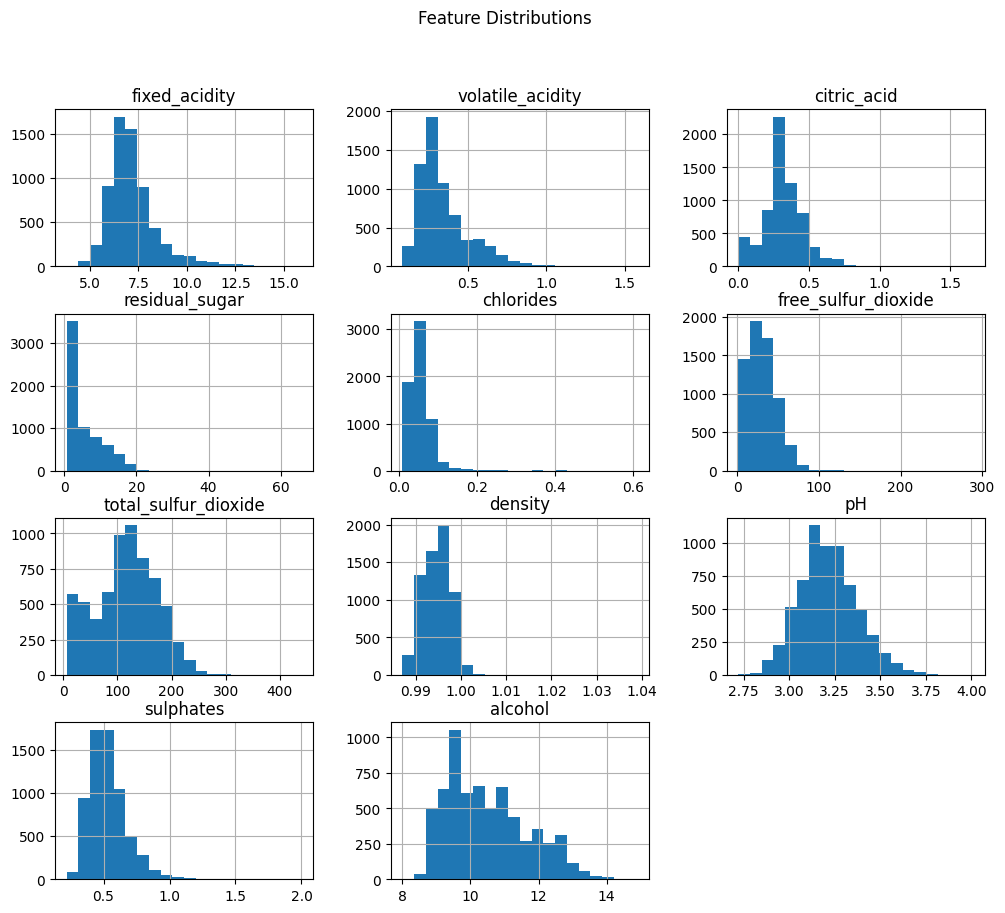

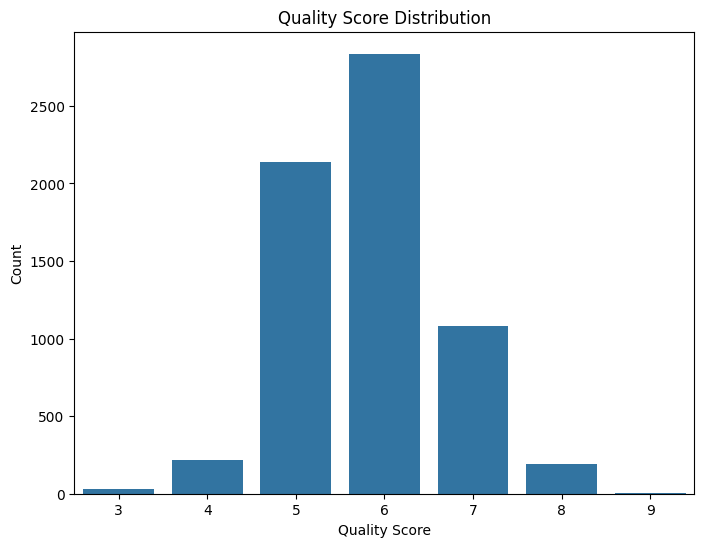

In [4]:
# Summary statistics
print("Feature statistics:")
print(X.describe())

# Target distribution
print("\nTarget (Quality) distribution:")
print(y['quality'].value_counts().sort_index())

# Visualize feature distributions
X.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

# Visualize target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y['quality'])
plt.title("Quality Score Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

In [5]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for consistency
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled features sample:")
print(X_scaled.head())

Scaled features sample:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol  
0 -0.915464  
1 -0

In [6]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (5197, 11) (5197, 1)
Test set shape: (1300, 11) (1300, 1)


In [7]:
# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # No activation for regression
])

# Model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # MAE as additional metric

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 14.6856 - mae: 3.2857 - val_loss: 2.1153 - val_mae: 1.0882
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.7315 - mae: 1.0220 - val_loss: 1.5411 - val_mae: 0.9347
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2748 - mae: 0.8812 - val_loss: 1.1692 - val_mae: 0.8219
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9703 - mae: 0.7722 - val_loss: 0.9087 - val_mae: 0.7266
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7623 - mae: 0.6846 - val_loss: 0.7386 - val_mae: 0.6560
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6357 - mae: 0.6222 - val_loss: 0.6369 - val_mae: 0.6111
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5670 - mae: 0.5849 - val_loss: 0.5816 - val_mae: 0.5867
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5316 - mae: 0.5644 - val_loss: 0.5515 - val_mae: 0.5736
Epoch 9/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error on Test Set: 0.4893


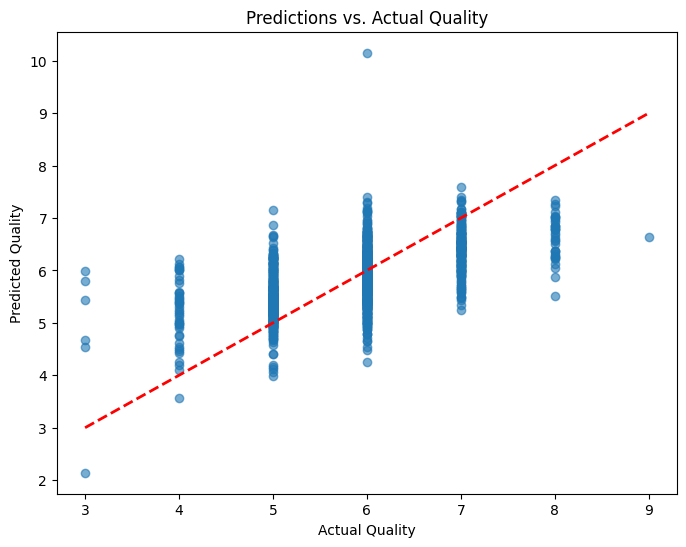

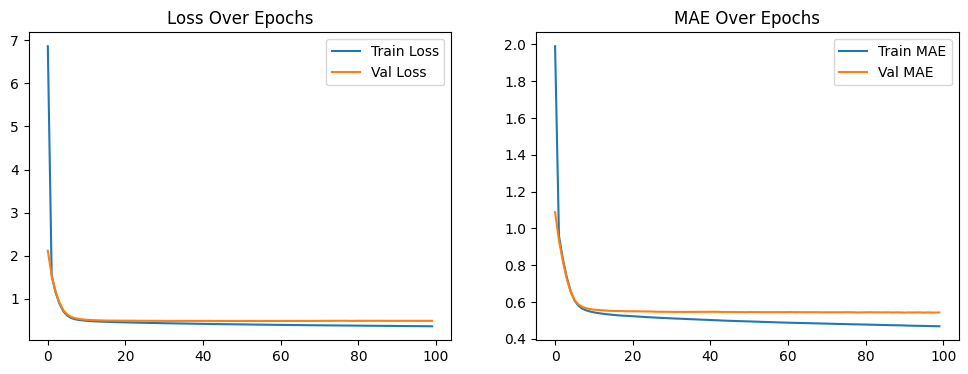

In [10]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

# Visualize predictions vs. actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Predictions vs. Actual Quality")
plt.show()

# Optional: Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Over Epochs')
plt.legend()
plt.show()